## Setup
---

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib, os
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set text displays for sklearn
from sklearn import set_config
set_config(display='text')
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)

from sklearn.inspection import permutation_importance
import shap
shap.initjs()

In [2]:
## Loading in model
loaded_joblib = joblib.load("Models/Project-One_Models.joblib")

In [3]:
## Saving model variables
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
loaded_model_rf = loaded_joblib['RandomForestRegressor']
loaded_model_linreg = loaded_joblib['LinearRegression']

## Permutation Importance
---

In [4]:
results = permutation_importance(loaded_model_linreg, X_test_df, y_test,scoring='r2',
                                n_jobs=-1,random_state=321)
results.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [5]:
## Saving the average permutation importance as a series
perm_importance = pd.Series(results["importances_mean"], index = loaded_model_linreg.feature_names_in_)
perm_importance

Item_Fat_Content_Low Fat          -0.000283
Item_Fat_Content_Regular          -0.000283
Item_Type_Baking Goods             0.000035
Item_Type_Breads                  -0.000145
Item_Type_Breakfast               -0.000080
Item_Type_Canned                  -0.000020
Item_Type_Dairy                   -0.001074
Item_Type_Frozen Foods             0.000127
Item_Type_Fruits and Vegetables   -0.000053
Item_Type_Hard Drinks              0.000001
Item_Type_Health and Hygiene      -0.000023
Item_Type_Household                0.000124
Item_Type_Meat                    -0.000090
Item_Type_Others                  -0.000048
Item_Type_Seafood                  0.000063
Item_Type_Snack Foods             -0.000012
Item_Type_Soft Drinks              0.000002
Item_Type_Starchy Foods           -0.000027
Outlet_Size_High                   0.012309
Outlet_Size_MISSING                0.007703
Outlet_Size_Medium                 0.001716
Outlet_Size_Small                  0.001844
Outlet_Location_Type_Tier 1     

In [6]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Permutations"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Permutation Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

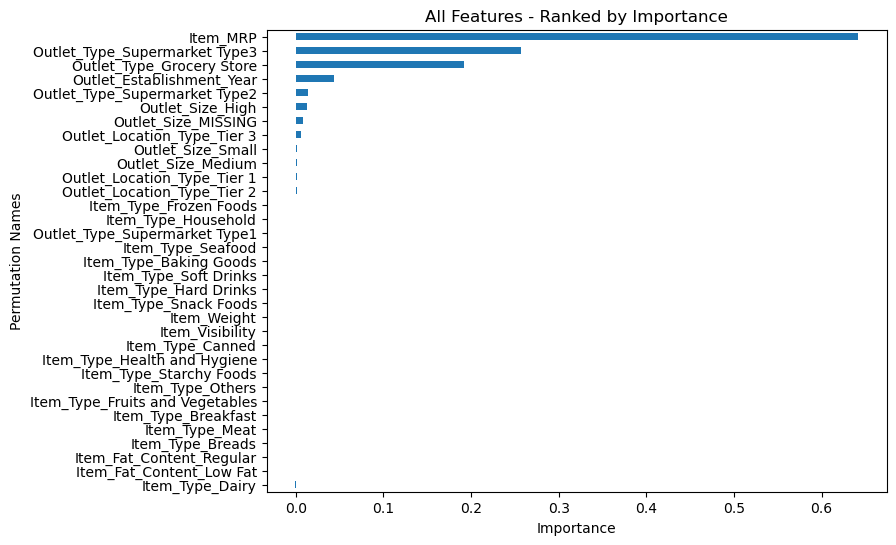

In [7]:
# Use the plot_importances function to visualize values
plot_importance(perm_importance);

## SHAP Visualization
---

In [8]:
## Taking a random sample of the training data
X_shap = shap.sample(X_train_df, nsamples = 500, random_state = 321)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
3888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15.85,0.110653,36.9506,2007.0
2497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,15.10,0.087407,221.8456,1997.0
7723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,17.50,0.015592,184.8266,2002.0
8117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,10.80,0.049820,243.2144,2002.0
7475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15.00,0.044999,140.4838,2002.0


In [9]:
## Instantiating model explainer
explainer = shap.Explainer(loaded_model_linreg, X_shap)

## Getting the values out of the explainer
shap_values = explainer(X_shap)

### Creating Bar Summary Plot of SHAP Values
---

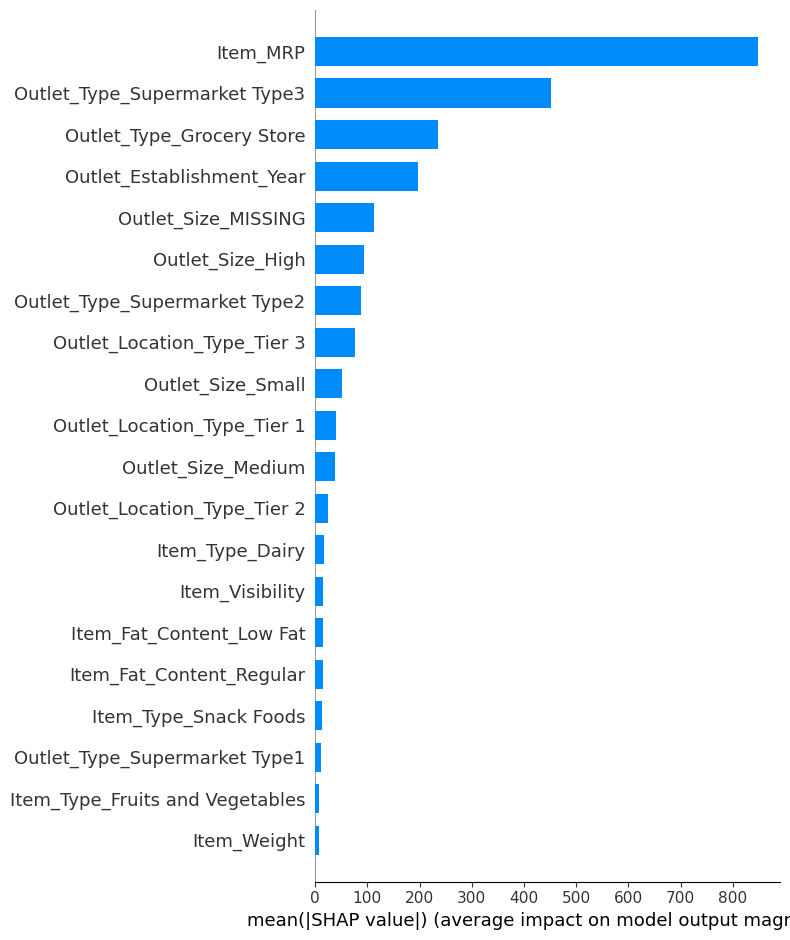

In [10]:
## Creating bar summary plot
shap.summary_plot(shap_values, features = X_shap, plot_type='bar')

### Comparing Permutation Importance with Feature Importance
---

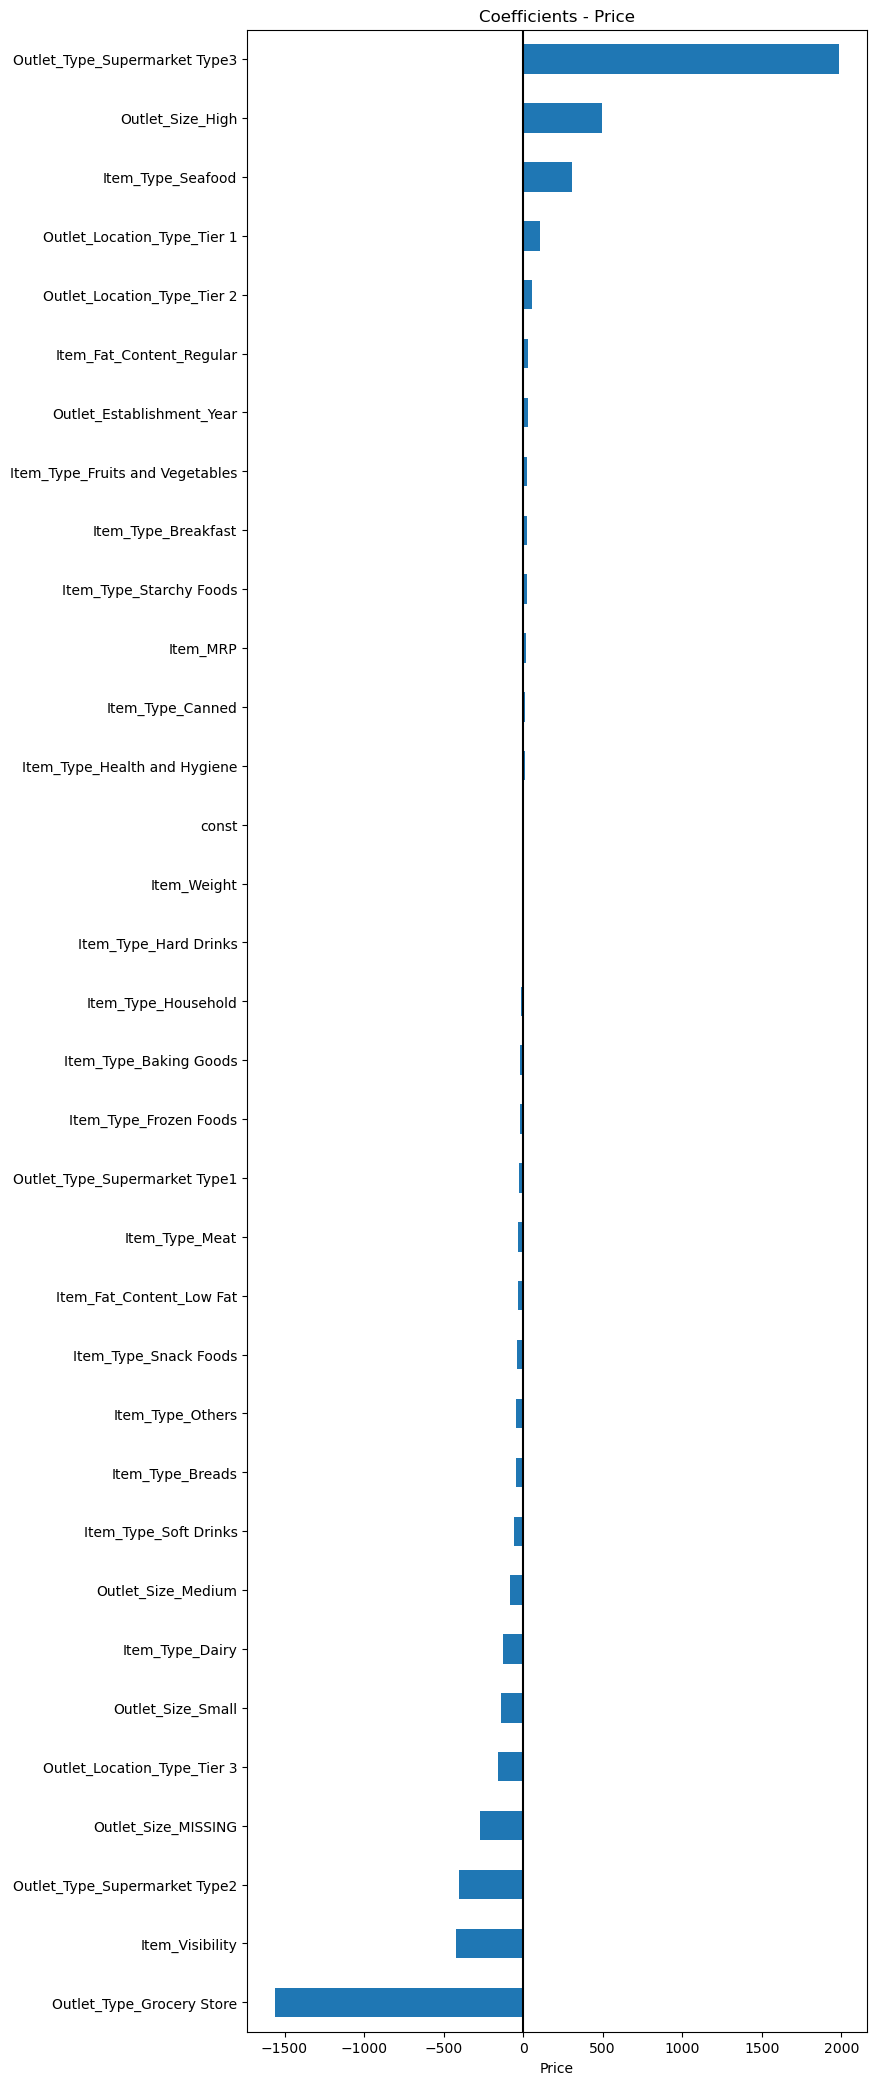

Feature Importance Bar Graph: 
1. Outlet_Type_Supermarket Type3
2. Outlet_Size_High
3. Item_Type_seafood

Permutation Importance Bar Graph: 
1. Item_MRP
2. Outlet_Type_Supermarket Type3
3. Outlet Type Grocery Store

The two graphs identified different features as being importance, the only feature they have in common being Outlet_Type_Supermarket Type3 though in different positions of importance.

### Creating Dot Summary Plot
---

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


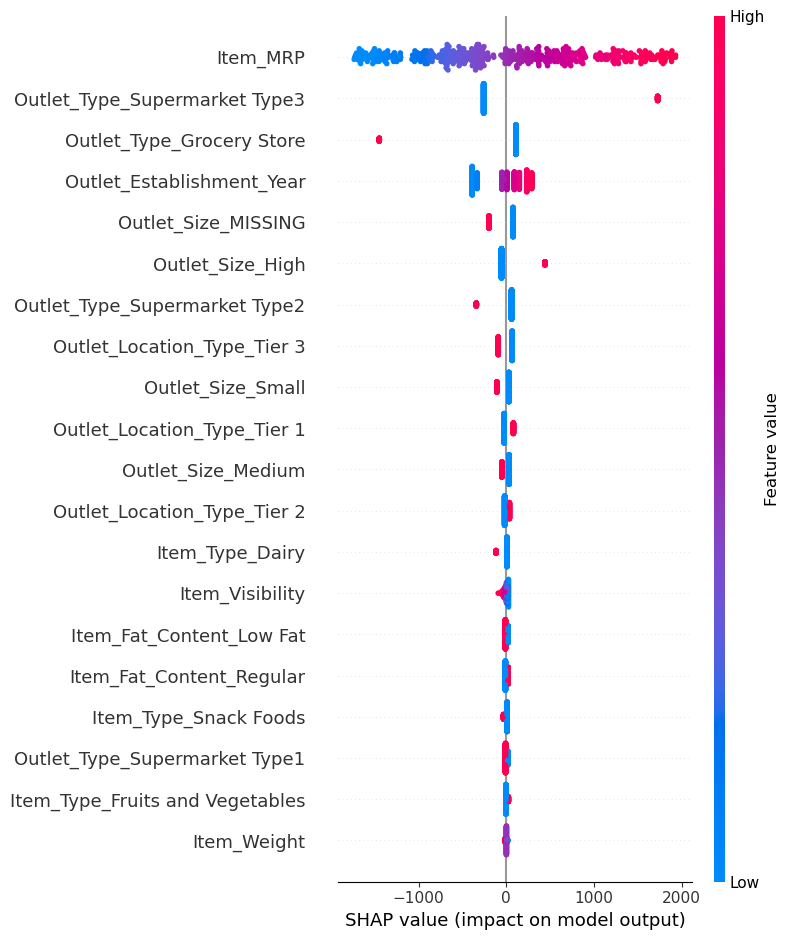

In [11]:
shap.summary_plot(shap_values, features = X_shap)

### Permutation Bar Graph Analysis
---

1. Item MRP - When Item MRP is of a higher value the overall sales of the store also increases. 
2. Outlet_Type_Supermarket Type3 -When this feature has a higher value sales increase.
3. Outlet Type Grocery Store - When the grocery store is type 3 the 

## Local Explanations
---

In [17]:
df_sales = pd.read_csv("Data/sales_predictions.csv")
low = df_sales["Item_Outlet_Sales"].min()
df_low
low

33.29

In [19]:
high = df_sales["Item_Outlet_Sales"].max()
high

13086.9648

### Example One: Low Total Sales
---


In [ ]:
|